In [124]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [125]:
# read Titanic csv file into dataframe
data = pd.read_csv('titanic_data.csv')
print ('number of records in original data: ', len(data))

#clean data by selecting records with Age field is a number
data=data[data.Age > 0]
print ('number of records in cleaned data: ',len(data))

number of records in original data:  891
number of records in cleaned data:  714


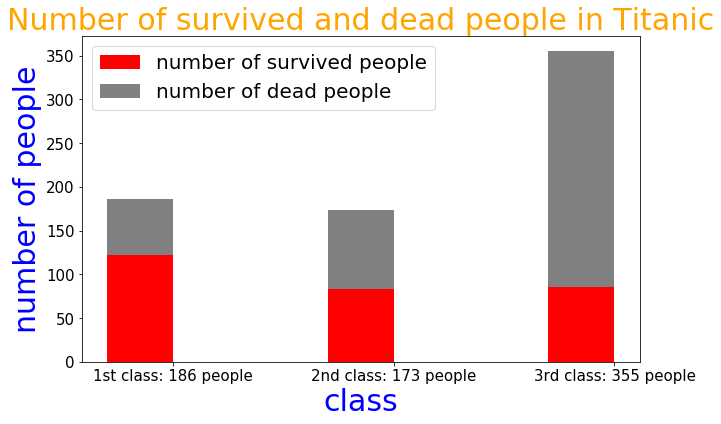

In [126]:
# group data file by class, get number of people in different classes 
num = data.groupby('Pclass').size()
list_num = list(num)

#Select survived/dead people to create new dataframe and then group it by class
#get number of survived/dead people in different classes 
num_sur = data[data.Survived==1].groupby('Pclass').size()
num_nosur = data[data.Survived==0].groupby('Pclass').size()

# plot histogram to show number of survived and dead people in different classes
ind = np.arange(3)
width=0.3
x=['1st class: '+str(list_num[0])+' people','2nd class: '+str(list_num[1])+' people','3rd class: '+str(list_num[2])+' people']
plt.figure(figsize=(10,6))
plt.bar(ind,num_sur,width,color='red',label=u'number of survived people')
plt.bar(ind,num_nosur,width,bottom=num_sur,color='grey',label=u'number of dead people')

plt.xlabel('class',color='b',fontsize=30)
plt.ylabel('number of people',color='b',fontsize=30)
plt.title('Number of survived and dead people in Titanic',size=15,color='orange',fontsize=30)
plt.xticks(ind+width/2,x,size=15)
plt.legend(fontsize=20)
plt.show()


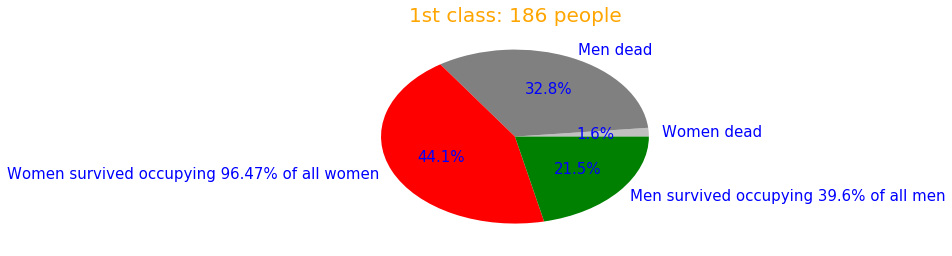

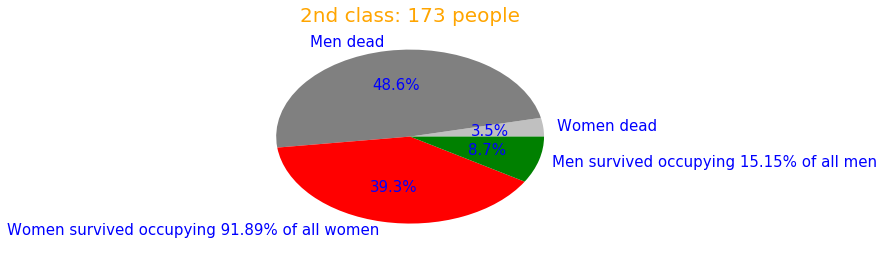

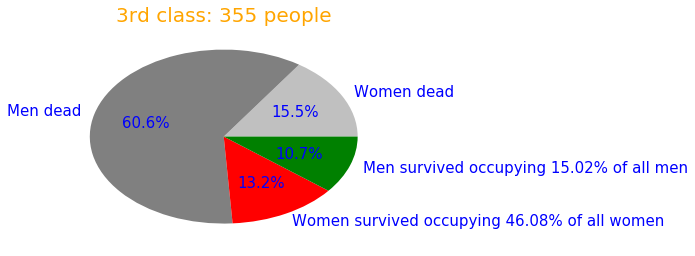

In [141]:
# for each of 3 different classes
for i in range(1,4,1):
    #group data by Survived and Gender fields, get number of people in 4 different groups: 
    #women dead, men dead, women survived, men survived. 
    gender = data[data.Pclass==i].groupby(['Survived','Sex']).size() 
    
    #get number of all people in this class
    allnum = gender.sum()
    
    #get percentage of the people of each group
    gender_per = gender*1.0*100/allnum
    
    #get percentage of survived women in all women and survived men in all men.
    labels = ['Women dead','Men dead',
              'Women survived occupying '+str(round((gender.iloc[2]/(gender.iloc[0]+gender.iloc[2]))*100,2))+'% of all women',
              'Men survived occupying '+str(round((gender.iloc[3]/(gender.iloc[1]+gender.iloc[3]))*100,2))+'% of all men']

    
    #plot pie to show percentage of survived/dead women/men in this class
    plt.pie(gender_per,labels=labels,autopct='%1.1f%%',colors=('silver','grey','red','green'),radius=1)
    if i == 1:
        plt.title('1st class: '+str(num.iloc[0])+' people',size=20,color='orange')
    elif i == 2:
        plt.title('2nd class: '+str(num.iloc[1])+' people',size=20,color='orange')
    else:
        plt.title('3rd class: '+str(num.iloc[2])+' people',size=20,color='orange')
    plt.rcParams['text.color'] = 'blue'
    plt.rc('font',size=15)
    
    plt.show()


             Age Group  Pclass  number of survived  number of all  \
0         Infants(0-2)       1                   1              2   
1         Infants(0-2)       2                   7              7   
2         Infants(0-2)       3                   7             15   
3       Children(3-12)       1                   2              2   
4       Children(3-12)       2                  10             10   
5       Children(3-12)       3                  13             33   
6   Adolescence(13-18)       1                  11             12   
7   Adolescence(13-18)       2                   6             12   
8   Adolescence(13-18)       3                  13             46   
9   YoungAdults(19-34)       1                  41             57   
10  YoungAdults(19-34)       2                  40             91   
11  YoungAdults(19-34)       3                  45            191   
12       Adults(35-60)       1                  64             99   
13       Adults(35-60)       2    

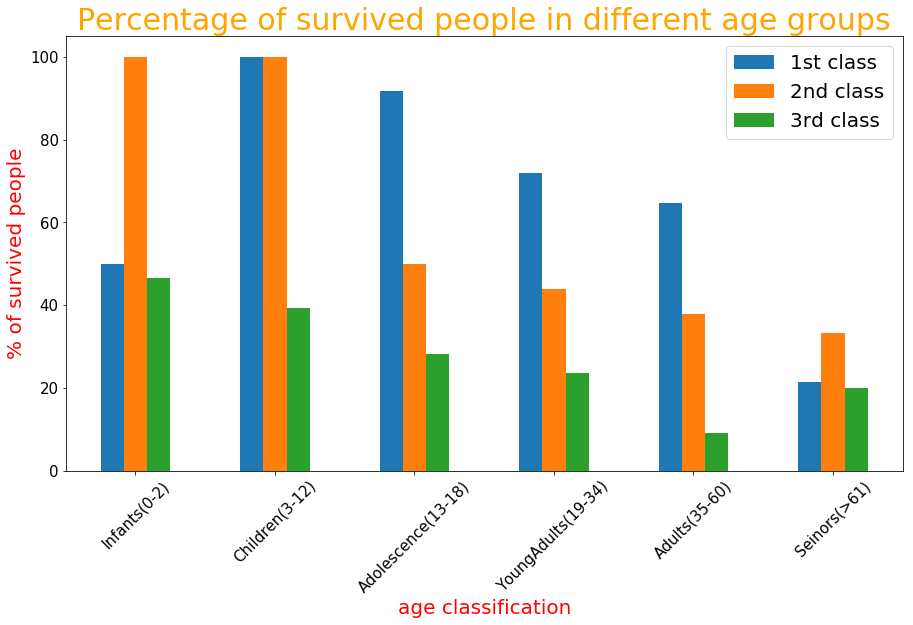

In [128]:
#add a column 'Age Group' in data, specifying the age group each record belongs to: 
#Infants(0-2), Children(3-12), Adolescence(13-18), YoungAdults(19-34), Adults(35-60), Seniors(>61)
data['Age Group'] = pd.cut(data['Age'],bins=[0,2,12,18,34,60,150],labels='Infants(0-2) Children(3-12) Adolescence(13-18) YoungAdults(19-34) Adults(35-60) Seinors(>61)'.split())

#select survived people from data, group the result by 'Age Group' and 'Pclass'
#get numbers of survived people in different age groups and classes
sur = DataFrame({'number of survived':data[data.Survived == 1].groupby(['Age Group','Pclass']).size()}).reset_index() 

#group all data (including survived and dead) by 'Age Group' and 'Pclass'
#get numbers of people in different age groups and classes, add this information as a column 'number of all'
#to previous survived people dataframe
allnum = data.groupby(['Age Group','Pclass'],as_index=False).size().reset_index(name='number of all')
sur['number of all'] = allnum['number of all']

#get percentage of survived people in different age groups and classes 
sur['surviving percentage'] = round(sur['number of survived']*1.0*100/sur['number of all'],2)

print (sur)

#plot bar to show percentage of survived people in different age groups and classes
sur.pivot(index='Age Group', columns='Pclass', values='surviving percentage').plot(kind='bar',figsize=(15,8))
plt.xlabel('age classification',color='r',size=20)
plt.ylabel('% of survived people',color='r',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.legend(['1st class','2nd class','3rd class'],fontsize=20)
plt.title('Percentage of survived people in different age groups',size=30,color='orange')
plt.show()


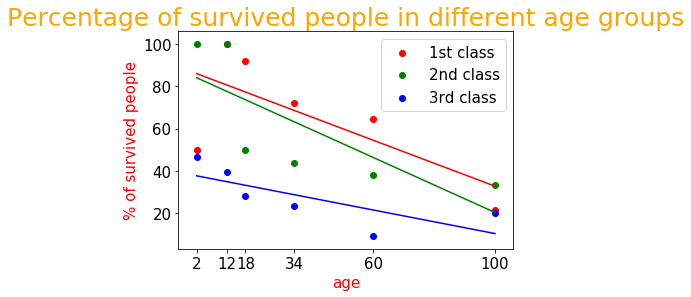

In [132]:
from numpy.polynomial import Polynomial

#create a list including the max number of age in each age group, use it as x when plotting scatter 
age_max = [2,12,18,34,60,100]

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 1st class
plt.scatter(age_max,sur[sur.Pclass==1]['surviving percentage'],color='r',label='1st class')

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 2nd class
plt.scatter(age_max,sur[sur.Pclass==2]['surviving percentage'],color='g',label='2nd class')

#plot scatter using x=age_max and y=percentage of survived people in corresponding age group in the 3rd class
plt.scatter(age_max,sur[sur.Pclass==3]['surviving percentage'],color='b',label='3rd class')

# for each class, fit the scatter points with a linear line to 
# check the relationship of the people's surviving percentage and their ages
f1 = Polynomial.fit(age_max,sur[sur.Pclass==1]['surviving percentage'],1)
f2 = Polynomial.fit(age_max,sur[sur.Pclass==2]['surviving percentage'],1)
f3 = Polynomial.fit(age_max,sur[sur.Pclass==3]['surviving percentage'],1)
plt.plot(*f1.linspace(),color='r')
plt.plot(*f2.linspace(),color='g')
plt.plot(*f3.linspace(),color='b')

#figure definition and show the plot
plt.xlabel('age',color='r')
plt.ylabel('% of survived people',color='r')
plt.xticks(age_max)
plt.title('Percentage of survived people in different age groups',color='orange',size=25)
plt.legend()
plt.figure(figsize=(20,15))
plt.show()